In [20]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



In [2]:
df = cudf.read_parquet('/rapids/my_data/US_Geodemographic/usa.bg.cc.parquet')

In [3]:
df

,GEOID,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,...,Tablet_or_other_portable_wireless_computer_with_no_other_type_of_computing_device,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription
0,020130001001,-4.325937,-5.121580,-5.634790,-5.634790,-4.156476,-6.000000,-2.875446,-2.214478,-2.899171,...,-4.069027,-2.098490,-6.000000,-2.503256,-2.503256,-2.284236,-2.014903,-0.253449,-1.922472,-3.562466
1,020130001002,-3.657755,-3.562883,-3.421503,-4.212128,-4.212128,-5.031255,-3.762030,-3.163786,-3.206297,...,-4.225373,-1.713288,-6.000000,-2.905686,-1.853635,-2.599598,-3.029530,-0.848671,-1.637430,-3.100971
2,020130001003,-4.330733,-3.406738,-3.358638,-4.165890,-4.866765,-6.000000,-3.752636,-2.731929,-3.185239,...,-6.000000,-2.082098,-6.000000,-3.536117,-1.745743,-1.842190,-4.243722,-0.675510,-1.609438,-3.004517
3,020160001001,-3.722020,-3.448929,-3.483889,-5.083473,-4.157841,-4.030590,-4.157841,-2.705862,-2.875302,...,-4.299550,-1.791759,-6.000000,-2.167811,-2.217225,-2.708050,-2.708050,-1.028408,-1.901458,-2.454693
4,020160002001,-4.235605,-3.960813,-3.290240,-4.308061,-4.386019,-4.775657,-3.743730,-3.015535,-2.910278,...,-6.000000,-2.995732,-5.342334,-1.558865,-2.995732,-1.772449,-3.367296,-1.526056,-1.646617,-3.945645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216093,560459511001,-2.894748,-3.464314,-3.353121,-4.127835,-6.000000,-6.000000,-4.376456,-3.043078,-3.615176,...,-4.169761,-1.789985,-4.276666,-0.598695,-2.175430,-2.518355,-3.756538,-1.390104,-1.167864,-4.786102
216094,560459511002,-4.873014,-4.287166,-3.325486,-6.000000,-3.665789,-6.000000,-4.873014,-4.371647,-2.710366,...,-6.000000,-2.010130,-6.000000,-3.771323,-1.302269,-2.230482,-2.671146,-1.379277,-2.408330,-2.639057
216095,560459513001,-3.410676,-2.518355,-6.000000,-2.790519,-6.000000,-4.531062,-6.000000,-2.683953,-3.513899,...,-6.000000,-1.892379,-4.123544,-1.035874,-2.496467,-2.601740,-2.022951,-1.207812,-0.940388,-6.000000
216096,560459513002,-3.168254,-4.211692,-6.000000,-3.632309,-6.000000,-4.483437,-3.023131,-3.213528,-3.949494,...,-6.000000,-3.086487,-6.000000,-1.493439,-0.536528,-2.986600,-2.588703,-2.622797,-1.565082,-6.000000


In [4]:
df = df.set_index('GEOID')

In [ ]:
cgram = Clustergram(range(1, 8), backend='cuML',n_init=10)

In [ ]:
cgram.fit(df)

In [5]:
cgram = Clustergram(range(1, 15), backend='sklearn',n_init=1000)

In [6]:
df2= df.to_pandas()

In [7]:
cgram.fit(df2)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 486.55285120010376 seconds.
K=3 fitted in 671.7569496631622 seconds.
K=4 fitted in 1030.722886800766 seconds.
K=5 fitted in 1388.1426901817322 seconds.
K=6 fitted in 1770.1685183048248 seconds.
K=7 fitted in 2407.0722494125366 seconds.
K=8 fitted in 2822.897218465805 seconds.
K=9 fitted in 3314.5160331726074 seconds.
K=10 fitted in 3203.3914194107056 seconds.
K=11 fitted in 3129.0598249435425 seconds.
K=12 fitted in 3654.5549099445343 seconds.
K=13 fitted in 3910.88148021698 seconds.
K=14 fitted in 4308.448749303818 seconds.


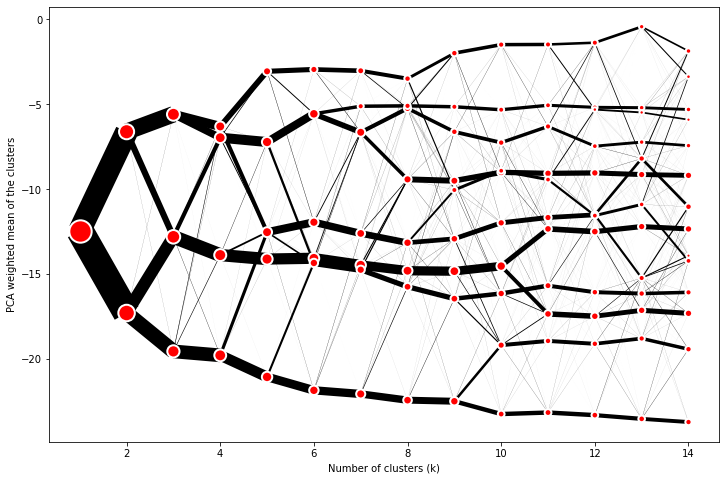

In [23]:
cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram.pdf')

In [22]:
with open('../data/clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)